# ****MORPHOLOGICAL PROCESSING****


#### Clàudia Blasco (1709871)
#### Laura Buide (1710559)
#### Carla Cruz (1703329)
#### Laia Espluga (1710510)
#### Lucía Rodríguez (1705385).

## **1. Introduction**
Morphological processing is a fundamental technique in computer vision that analyzes and manipulates the structure of objects within an image. Based on set theory, it is primarily applied to **binary images** but can also be extended to **grayscale images**. Through operations such as **erosion, dilation, opening, and closing**, morphological processing enables **shape extraction, noise reduction, edge detection, and object segmentation**, making it essential in fields like **medicine, industry, and security**. This project aims to explore these concepts, demonstrating their applications and impact on image analysis.

## **2. Mathematical Foundations of Morphological Processing**

### 1. Set Theory: Understanding Sets in a Discrete Space
Morphological image processing is fundamentally based on **set theory**, where objects in a **binary image** are treated as sets of points in a **discrete space** (typically a 2D grid).  
- A **binary image** consists of pixels with values **1 (foreground, object)** and **0 (background)**.  
- The object in an image is represented as a **set of foreground pixels**, while the background is treated as the **complementary set**.  

For example, an image \( A \) containing an object can be represented as:  


$$ A = \{(x,y) \mid f(x,y) = 1\} $$


where \( f(x,y) \) is the pixel value at coordinates \( (x,y) \).  

In morphological operations, these **sets of pixels** are manipulated using **structuring elements** to **modify shapes, extract features, or remove noise**.



### 2. Structuring Elements: Definition and Interaction with the Image  
A **structuring element (SE)** is a small matrix (or kernel) that interacts with an image to **probe** and **modify** its structure.  
- It is defined as a **binary set of pixels** (typically a small square, cross, or circle).  
- The **origin (center)** of the structuring element determines how it overlaps with the image pixels.  

Mathematically, if \( B \) is a structuring element, it is defined as:  

$$ B = \{(x,y) \mid b(x,y) = 1\}$$

where \( b(x,y) \) represents the pixel values of the structuring element.

#### *How the Structuring Element Interacts with an Image*  
- It is **placed over each pixel of the image**, aligning its center with the pixel.  
- Depending on the operation (erosion, dilation, etc.), the interaction between the structuring element and the underlying pixels **modifies the image**.  

For example, a **3×3 cross-shaped structuring element**:


$$ B =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

This structuring element is commonly used for morphological operations like **dilation** and **erosion**.

### 3. Basic Set Operations in Morphological Processing  
Morphological processing uses fundamental **set operations** to manipulate images:

#### 3.1 Intersection (A ∩ B)  
- Finds **common pixels** between two sets (or binary images).  
- In morphological processing, intersection can be used to **detect overlapping objects**.  

Mathematically:

$$ A \cap B = \{(x,y) \mid (x,y) \in A \text{ and } (x,y) \in B\} $$

#### 3.2 Union (A ∪ B)  
- Combines pixels from both sets, **merging objects** in an image.  
- Used in **image fusion or combining binary masks**.  

Mathematically:

$$ A \cup B = \{(x,y) \mid (x,y) \in A \text{ or } (x,y) \in B\}$$

#### 3.3 Complement (¬A)  
- **Inverts the image** by flipping foreground and background.  
- Used to **highlight objects against the background** or **prepare images for further processing**.  

Mathematically:

$$ \neg A = \{(x,y) \mid (x,y) \notin A\}$$

### Application of These Operations in Morphology  
This **mathematical foundation** forms the basis for morphological operations like **erosion, dilation, opening, and closing**, which are essential for **shape analysis, noise removal, and feature extraction** in image processing. 


Here’s a Python code that demonstrates the mathematical applications for morphological image processing. This code applies fundamental morphological operations—erosion, dilation, and complementation—on a binary image, using a structuring element (kernel) to probe and modify the image’s structure.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

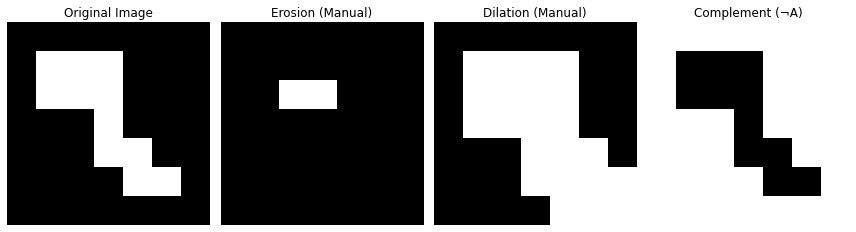

In [2]:
# Función para aplicar erosión manualmente
def erosion_manual(image, struct_elem):
    h, w = image.shape
    sh, sw = struct_elem.shape
    pad_h, pad_w = sh // 2, sw // 2

    # Convertimos la imagen a binaria si está en 0-255 (para que sea binaria en 0-1)
    if np.max(image) == 255:
        image = image // 255  # Convertir la imagen a valores binarios 0 o 1

    # Aplicamos padding a la imagen original
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)

    # Aplicar erosión recorriendo la imagen
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            
            # Comprobamos si todos los píxeles donde hay 1s en el struct_elem son 1 en la imagen binaria
            if np.all(region[struct_elem == 1] == 1):  
                eroded_image[i, j] = 1  # Mantiene el píxel solo si encaja con el structuring element

    return eroded_image

# Función para aplicar dilatación manualmente
def dilatacion_manual(image, struct_elem):
    h, w = image.shape
    sh, sw = struct_elem.shape
    pad_h, pad_w = sh // 2, sw // 2

    # Convertimos la imagen a binaria si está en 0-255 (para que sea binaria en 0-1)
    if np.max(image) == 255:
        image = image // 255  # Convertir la imagen a valores binarios 0 o 1

    # Imagen con padding
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    # Aplicar dilatación
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            # Si al menos un píxel de la región es 1 en el structuring element
            if np.any(region[struct_elem == 1] == 1):  
                dilated_image[i, j] = 1

    return dilated_image

# Crear una imagen binaria de prueba
image = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Elemento estructurante pequeño
structuring_element = np.array([
    [1, 1],
    [1, 1]
])

# Aplicar erosión y dilatación manual
eroded_image = erosion_manual(image, structuring_element)
dilated_image = dilatacion_manual(image, structuring_element)

# Complemento de la imagen
complement_image = np.logical_not(image).astype(int)

# Mostrar imágenes
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Erosion (Manual)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilation (Manual)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(complement_image, cmap='gray')
plt.title('Complement (¬A)')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Explanation of the Code:
- **Original Image**: A 7x7 binary image with some foreground objects (1's) and background (0's).
- **Structuring Element**: A 3x3 cross-shaped structuring element used for morphological operations.
- **Erosion**: The operation of intersection between the image and the structuring element. Only pixels fully surrounded by the structuring element (1's) remain in the image.
- **Dilation**: The operation of union between the image and the structuring element. Pixels are added to the image where the structuring element overlaps.
- **Complement**: Inverts the image, changing foreground pixels (1's) to background pixels (0's) and vice versa.

#### How it connects to the mathematical applications:
- The **erosion** operation is equivalent to the intersection $(A \cap B)$, which removes pixels from the boundary of the foreground.
- The **dilation** operation is equivalent to the union $(A \cup B)$, which adds pixels to the boundary of the foreground.
- The **complement** operation inverts the image $( \neg A)$, flipping the 1's and 0's.

Running this code in a Jupyter notebook will display the original image and the results of the morphological operations, visually demonstrating the mathematical concepts of intersection, union, and complement.

## **3. Basic Morphological Operations**

Morphological processing is a technique used in image processing to modify and analyze shapes in an image. It works mainly with binary images (black-and-white images) and uses a structuring element, which is a small shape that interacts with objects in the image. 

The four basic operations are Erosion, Dilation, Opening, and Closing.

### 1. Erosion: Making Objects Smaller

Erosion is a process that shrinks (become or make smaller in size or amount) objects in an image. It works by removing pixels from the edges of objects based on the structuring element. If the structuring element does not fully fit inside the object, that part of the object disappears.

**Uses of Erosion**:
- Removes small details or noise from an image.
- Separates objects that are touching.
- Makes objects look thinner.

**Example**: If you apply erosion to a text image, the letters will become thinner.

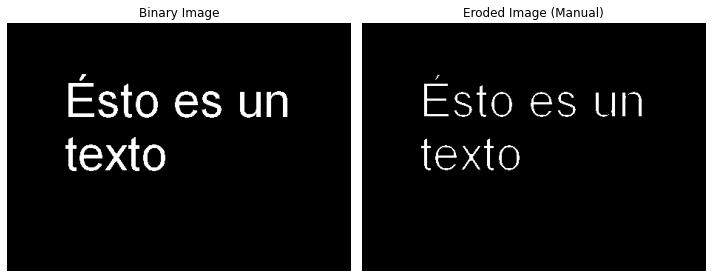

In [3]:
# Cargar la imagen en escala de grises
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convertir la imagen a binaria (fondo negro, texto blanco)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Definir el kernel para la erosión (prueba con 3x3 o 5x5)
kernel = np.ones((3, 3), np.uint8)  # Puedes cambiarlo a (5,5) si lo deseas

# Aplicar erosión manual
eroded_image = erosion_manual(binary, kernel)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image (Manual)")
plt.axis("off")

plt.tight_layout()
plt.show()

### 2. Dilation: Making Objects Bigger
Dilation is the opposite of erosion. Instead of removing pixels, it adds pixels to the edges of objects, making them larger. If any part of the structuring element touches the object, the object grows in size.

**Uses of Dilation**:
- Fills small holes inside objects.
- Connects broken parts of an object.
- Makes objects thicker.

**Example**: If you apply dilation to a broken line, the gaps will be filled, making it a complete line. In this case the line it's not broken, so it becomes thicker.



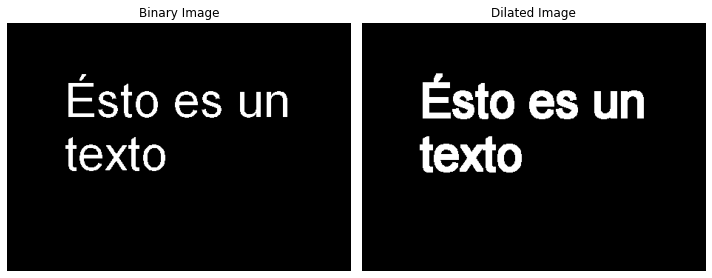

In [4]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for dilation
kernel = np.ones((4, 4), np.uint8)  # Kernel size 4x4

# Apply dilation
dilated = dilatacion_manual(binary, kernel)

# Display the original and dilated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### 3. Opening: Removing Small Objects
Opening is a combination of erosion followed by dilation.

First, erosion removes small objects (such as noise).
Then, dilation restores the main shapes of the image.

**Uses of Opening**:
- Removes random small white dots (noise).
- Helps smooth object boundaries.
- Keeps important parts of the image while removing unwanted details.

**Example**: If an image has small white specks (like dust on a black background), opening can remove them.

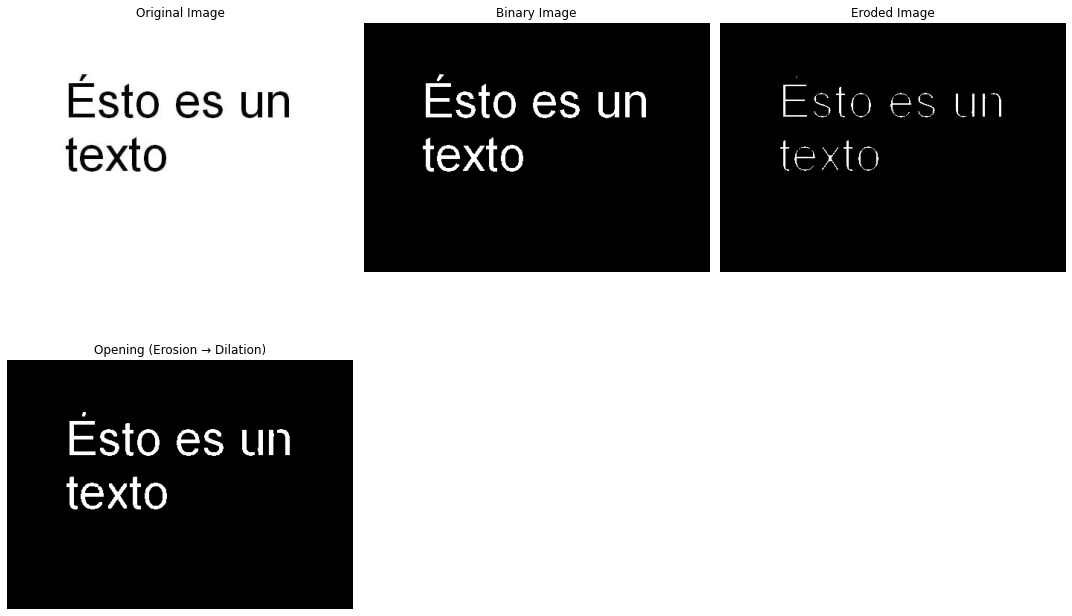

In [19]:
# Cargar la imagen en escala de grises
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if image is None:
    raise FileNotFoundError("⚠️ Imagen no encontrada. Revisa el nombre del archivo y la ruta.")

# Convertir a binaria (umbralización)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Definir un elemento estructurante (kernel)
kernel = np.ones((4, 4), np.uint8)

# Opening
def opening(binary_image, kernel):
    # Erosión manual
    eroded_image = erosion_manual(binary_image, kernel)
    # Dilatación manual
    dilated_image = dilatacion_manual(eroded_image, kernel)
    return eroded_image, dilated_image

eroded_image, dilated_image = opening(binary, kernel)

# Mostrar todas las imágenes 
titles = ["Original Image", "Binary Image", "Eroded Image", "Opening (Erosion → Dilation)"]
images = [image, binary, eroded_image, dilated_image]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


### 4. Closing: Filling Small Gaps
Closing is the opposite of opening. It is a dilation followed by erosion.

First, dilation expands the objects, filling small holes and gaps.
Then, erosion restores the original shape without bringing back the gaps.

**Uses of Closing**:
- Fills small holes in an image.
- Connects objects that are close together.
- Makes object boundaries smoother.

**Example**: If an object has tiny black holes inside, closing will fill them up, making the object solid.

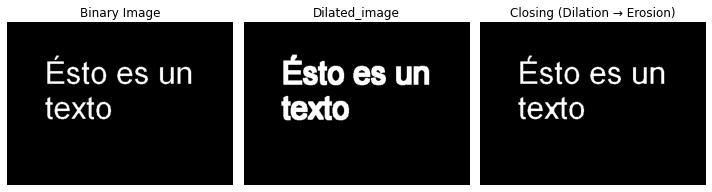

In [7]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define a structuring element (kernel)
kernel = np.ones((5,5), np.uint8)  

# Apply dilation
dilated_image = dilatacion_manual(binary, kernel)

# Apply erosion
eroded_image = erosion_manual(dilated_image, kernel)

# Display the original and processed images
titles = ["Binary Image", "Dilated_image","Closing (Dilation → Erosion)"]
images = [binary, dilated_image, eroded_image]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## **4. Advanced Morphological Operations**
Advanced morphological operations extend basic transformations like erosion and dilation to more complex image processing tasks. These operations are widely used in computer vision, medical imaging, and pattern recognition. 

The main advanced operations include Morphological Gradient, Top-Hat/Black-Hat and Skeletonization.

### 1. Morphological Gradient

Morphological Gradient is a process that highlights the edges of objects by subtracting the eroded version of an image from the dilated version.

**How Does the Kernel Affect This?**
The kernel (np.ones((3,3), np.uint8)) defines the neighborhood for dilation and erosion:

    Larger kernel → Thicker edges.
    Smaller kernel → Finer edges.

**Uses of Morphological Gradient**:
- Edge detection
- Object boundary enhancement

**Example**: If you apply this process to a text image, it will extract the edges.

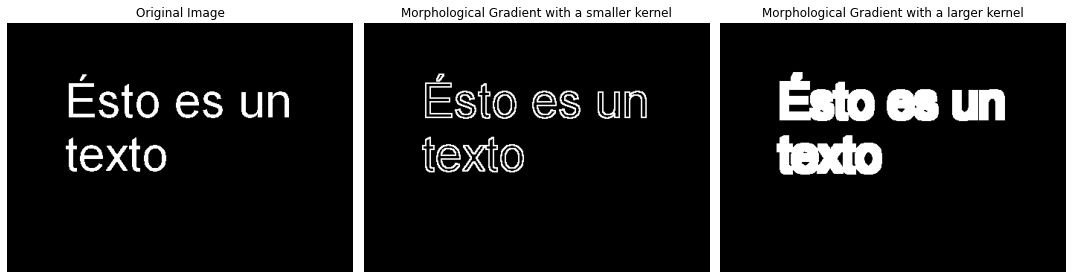

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for morphological operations
small_kernel = np.ones((3, 3), np.uint8)
large_kernel = np.ones((8, 8), np.uint8)

# Define manual erosion and dilation functions
def erosion_manual(img, kernel):
    return cv2.erode(img, kernel, iterations=1)

def dilatacion_manual(img, kernel):
    return cv2.dilate(img, kernel, iterations=1)

# Calculate the morphological gradient
def gradient(binary_image, kernel):
    dilated_image = dilatacion_manual(binary_image, kernel)
    eroded_image = erosion_manual(binary_image, kernel)
    return dilated_image - eroded_image  # Gradient = Dilation - Erosion

# Compute gradients with different kernels
fine_gradient = gradient(binary, small_kernel)
thick_gradient = gradient(binary, large_kernel)

# Display the original and gradient images
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Display gradient image with small kernel
plt.subplot(1, 3, 2)
plt.imshow(fine_gradient, cmap='gray')
plt.title("Morphological Gradient with a smaller kernel")
plt.axis("off")

# Display gradient image with large kernel
plt.subplot(1, 3, 3)
plt.imshow(thick_gradient, cmap='gray')
plt.title("Morphological Gradient with a larger kernel")
plt.axis("off")

plt.tight_layout()
plt.show()


### 2. Top-Hat Transformation

Top-Hat is a transformation that extracts small bright regions from the image by subtracting the opened image from the original.

**Uses of Top-Hat Transformation**:
- Enhancing bright details.
- Enhancing contrast (useful for faded or scanned text)

**Example**: If you apply this process to a text image with an uneven background, it will enhance the text while removing background noise.

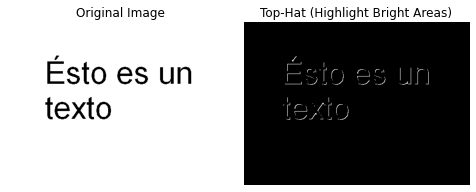

In [7]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((4,4), np.uint8)  

# Apply Top-Hat Transform (Extracts bright regions)
tophat = cv2.morphologyEx(binary, cv2.MORPH_TOPHAT, kernel)

# Display the original and processed images
titles = ["Original Image", "Top-Hat (Highlight Bright Areas)"]
images = [binary, tophat]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

### 3. Black-Hat Transformation

Black-Hat is a transformation that extracts dark regions by subtracting the original image from its closed version.

**Uses of Black-Hat Transformation**:
- Detecting dark regions in a bright background.
- Removing uneven shadows in text images.

**Example**: If you apply this process to a text image with an light background, it will extract shadows and dark areas, making the text more distinguishable. Similar to Top-Hat Transformations, it also removes background noise.

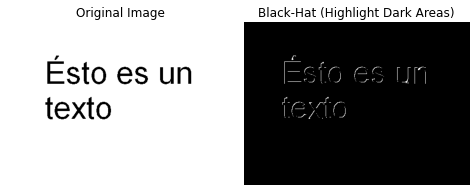

In [8]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a structuring element (kernel)
kernel = np.ones((4,4), np.uint8)  

# Apply Black-Hat Transform (Extracts dark regions)
blackhat = cv2.morphologyEx(binary, cv2.MORPH_BLACKHAT, kernel)

# Display the original and processed images
titles = ["Original Image", "Black-Hat (Highlight Dark Areas)"]
images = [binary, blackhat]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

**Compariosion between Top-Hat and Black-Hat Transformation**

The Top-Hat transformation highlights the bright regions removed by morphological opening, while the Black-Hat highlights the dark regions removed by morphological closing.

### 4. Skeletonization

This process reduces objects to their thin, connected centerlines, preserving topology.

**Uses of Skeletonization**:
- Reducing text to its centerlines.
- Character recognition and feature extraction.

**Example**: If you apply this process to a text image, it will thin the letters to their minimal representation while preserving connectivity.

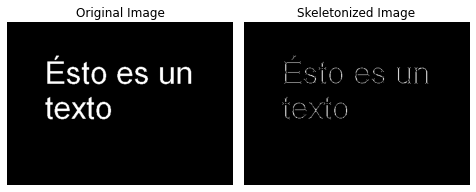

In [14]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Fast skeletonization with OpenCV
binary_skel = binary.copy()
skel = np.zeros(binary_skel.shape, np.uint8)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

while True:
    eroded_temp = cv2.erode(binary_skel, element)
    temp = cv2.dilate(eroded_temp, element)
    temp = cv2.subtract(binary_skel, temp)
    skel = cv2.bitwise_or(skel, temp)
    binary_skel = eroded_temp.copy()
    if cv2.countNonZero(binary_skel) == 0:
        break

# Display the skeletonized image
titles = ["Original Image", "Skeletonized Image"]
images = [binary, skel]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

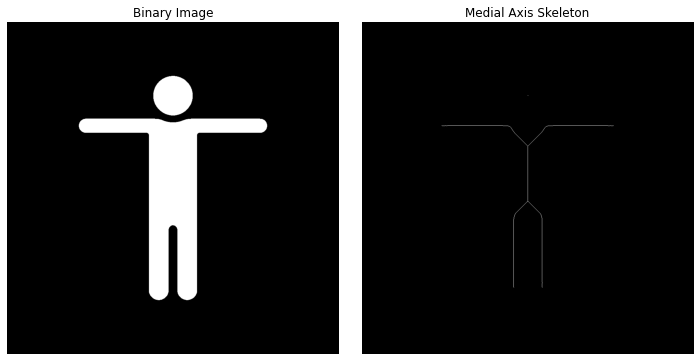

In [11]:
from skimage.morphology import skeletonize
# Load and convert image to binary
image = cv2.imread("human.jpg", cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Apply medial axis skeletonization
skeleton = skeletonize(binary > 0)  # Convert to boolean mask

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap="gray")
plt.title("Medial Axis Skeleton")
plt.axis("off")

plt.tight_layout()
plt.show()


### 5. Watershed Segmentation

This process is a powerful image processing technique used for separating overlapping or touching objects in an image. It is based on the concept of topography, where an image is treated as a 3D surface with peaks (bright arear) and valleys (dark areas). The watershed algorithm floods the valleys and progressively fills them until boundaries between objects are detected.

**Uses of Watershed Segmentation**:
- Medical Imaging: Used for segmenting organs, tumors, and cells in radiological scans and microscopic images.

- Object Detection: Helps in separating touching objects in images, such as coins, cells, or grains.

- Document Analysis: Useful for segmenting overlapping text or symbols.

**Example**: 

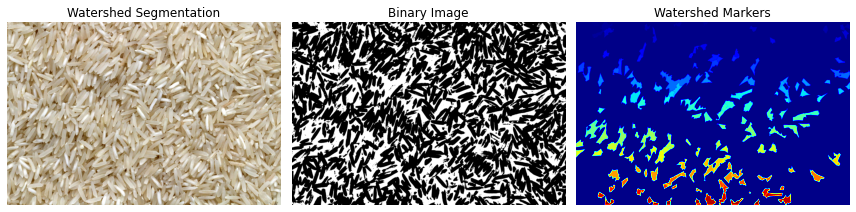

In [22]:
# Load the image
image_path = 'rice.jpeg'
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    raise FileNotFoundError(f"Could not load image at {image_path}")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Convert to binary using thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove small noise using morphological opening
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area using dilation
sure_bg = cv2.dilate(cleaned, kernel, iterations=3)

# Compute the Distance Transform to get sure foreground
dist_transform = cv2.distanceTransform(cleaned, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)  # Adjust threshold

# Convert sure foreground to uint8
sure_fg = np.uint8(sure_fg)

# Identify unknown region (possible object boundaries)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for watershed (connected components)
num_labels, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so background is not 0
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply Watershed algorithm
markers = cv2.watershed(image, markers)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(markers, cmap='jet')
plt.title("Watershed Markers")
plt.axis("off")

plt.tight_layout()
plt.show()


### 6. Counting Grains

Morphological transformations help in counting grains by using image processing techniques such as thresholding, erosion, dilation, and segmentation to separate and detect individual grains in an image.

**Uses of Counting Grains**:
- Agriculture: Counting rice, wheat, or seed grains for quality control.
- Food Industry: Measuring grain size and distribution.
- Material Science: Analyzing granular substances like powders.
- Biology & Microscopy: Counting cells or microscopic particles.

**Example**: If you use this transformation on an image with visible grains (in the following example, grains of rice), it can provide an approximate count of the grains in the picture.

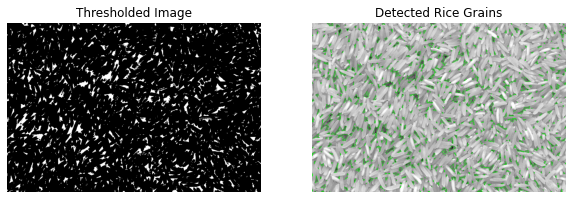

In [3]:
from IPython.display import display, Image
display(Image("descarga.png"))

## **6. Applications and Use Cases**


### 1. Computer Vision: Object recognition in medical, industrial, and security images.

Morpholigcal processing can help in the computer vision in different fields:

In the medical field, it's useful to detect and segment atomic structures. For instance, it improves cells and tissues microscopy images as  edges are more accurate, enhances tumor detection, since it allows the refinement of contours in mammograms or magnetic resonances, and helps with noise removal. To achieve these applications, we use opening and closing to remove noise and improve segmentation and dilation and erosion to highlight structures or remove unwanted details.

In industry, it's useful for quality control, as it detects defects, such as product imperfections like twists or holes in pieces. It can also detect failures in the textile structure sand it can automatically count transported products.

### 2. Image Reconstruction: Noise removal and image quality enhancement.

Morphological processing plays a significant role in image reconstruction. Many images, especially those captured under noisy environments, can benefit from these morphological operations.

Noise removal is particularly beneficial when trying to clean up noisy data in medical imaging, such as MRI scans or industrial inspection images. Small, unwanted features can be removed through operations like opening, which eliminates small objects in the image while preserving the larger, more meaningful structures.

Image enhancement helps in improving the overall quality of an image, whether it's for better analysis in medical diagnostics or clearer visual data for industrial automation systems. Morphological filtering can enhance image features without introducing blurring, making edges sharper and objects more distinguishable. 

### 3. Document Processing: Text recognition in scanned documents.
Morphological processing plays a crucial role in text recognition for scanned or handwritten documents by removing noise, enhancing characters, and segmenting text before applying Optical Character Recognition (OCR). 

Techniques like opening and closing help eliminate smudges, stains, and ink artifacts, while erosion separates connected characters, and dilation strengthens faint text. Additionally, these operations assist in detecting tables, forms, and structured elements, improving OCR accuracy in bank checks, legal documents, and historical archives, ultimately making text processing more efficient.



## **Challenge**  

After reading the explanation, using the image **rice.jpeg**, you must implement the **grain counting technique** to obtain the **total number of grains** in the photo as the final result. 

CLUE!  : Total rice grains counted: 818

In [1]:
#Implement your code here